### Loading all the important libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset is loaded.

In [2]:
df1=pd.read_csv("dataset_tele.csv")

### Displaying the first 5 rows.

In [3]:
## to display all columns, if the columns are in a truncated form
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## Calculating total rows.
len(df1)

7043

### Checking for null values in the dataset.

In [5]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b><i>--There are no NULL values in our dataset--</i></b>

In [6]:
## Checking data types of each columns.
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<b><i>--From above results, we can see that the type of TotalCharges column is Object, which is suspicious as the data it contains is of type float.--</i></b>

In [7]:
## Checking for any letters in column TotalCharges.
df1[df1['TotalCharges'].str.isalpha()].shape[0]

0

<b><i>--There are no letters present in the column--</i></b> 

In [8]:
## Checking if it contains empty values
df1[(df1['TotalCharges']==' ')].shape[0]

11

<b><i>--<u>The column contains 11 empty values</u>--</i></b>

### Handling missing data
<b><i>--Since the dataset size is small, filling all the missing values in 'TotalCharges' with mean.--</i></b> 

In [9]:
## converting to float, 'coerce' converts all non convertable values to NaN
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [10]:
## filling with mean values
df1['TotalCharges'].fillna(float(df1['TotalCharges'].mean()), inplace=True)

In [11]:
## datatype converted to float type
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 1) Compare churn count with respect to gender. 

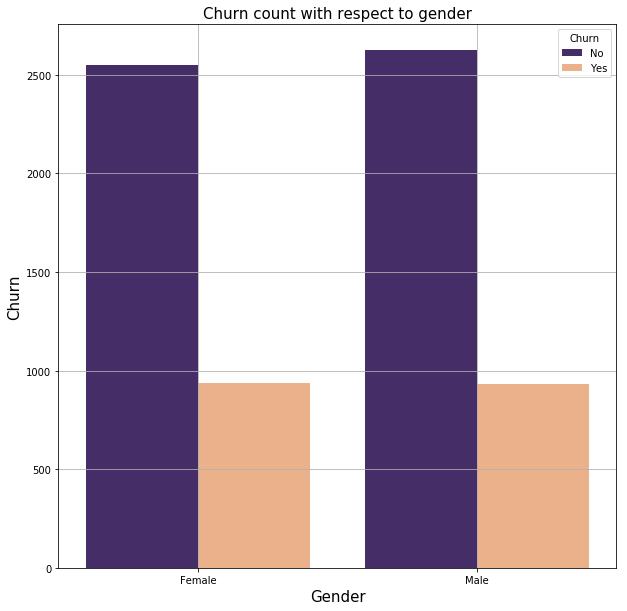

In [12]:
plt.figure(figsize=(10,10))
plt.title("Churn count with respect to gender",fontsize=15)
sns.countplot(df1['gender'],hue=df1['Churn'],palette=['#432371',"#FAAE7B"])
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Churn",fontsize=15)
plt.grid()
plt.show()

In [13]:
fn=df1[(df1['Churn']=='No') & (df1['gender']=='Female')].shape[0]
fy=df1[(df1['Churn']=='Yes') & (df1['gender']=='Female')].shape[0]
mn=df1[(df1['Churn']=='No') & (df1['gender']=='Male')].shape[0]
my=df1[(df1['Churn']=='Yes') & (df1['gender']=='Male')].shape[0]
print("No of females will not churn:",fn)
print("No of females might churn:",fy)
print("No of males will not churn:",mn)
print("No of males might churn:",my)

No of females will not churn: 2549
No of females might churn: 939
No of males will not churn: 2625
No of males might churn: 930


### 2) Find out how many female senior citizens there in the dataset 

In [14]:
fs=df1[(df1['SeniorCitizen']==1) & (df1['gender']=='Female')].shape[0]
print("No of female senior citizens:",fs)

No of female senior citizens: 568


### 3) Compare 'tenure' with 'Total Charges' 

In [15]:
## quick summary of tenure column
df1['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [16]:
## quick summary of totalcharges column
df1['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [17]:
## calculating mean value for each tenure.
df2=df1.groupby('tenure').mean().reset_index()

In [18]:
df2.dtypes

tenure              int64
SeniorCitizen     float64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [19]:
df2.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0,0.000000,41.418182,2283.300441
1,1,0.140294,50.485808,50.485808
2,2,0.180672,57.206303,114.332353
3,3,0.125000,58.015000,174.690000
4,4,0.147727,57.432670,230.530682


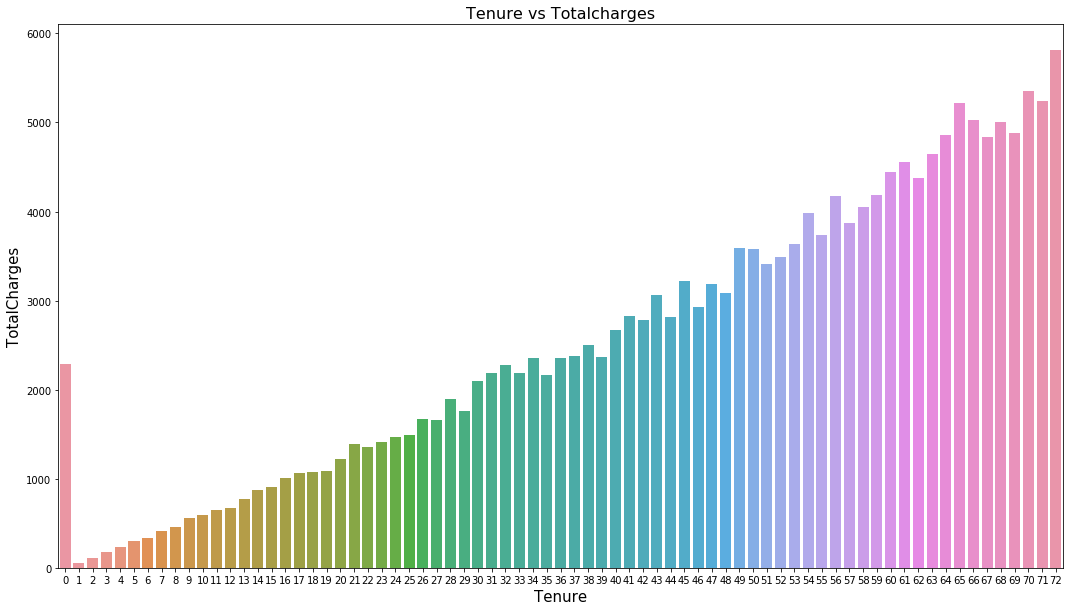

In [20]:
plt.figure(figsize=(18,10))
sns.barplot(x ='tenure',y ='TotalCharges',data = df2)
plt.title("Tenure vs Totalcharges",fontsize=16)
plt.xlabel("Tenure",fontsize=15)
plt.ylabel("TotalCharges",fontsize=15)
plt.show()

<b><i>--From above graph we can see that as tenure tend to increase,the total charges increases except for 0th tenure.--</i></b>

### 4) Find out which contract prefered by the senior citizen. 

In [21]:
## to see which contract is prefered by senior citizen
df1['Contract'][df1['SeniorCitizen']==1].value_counts()

Month-to-month    807
One year          190
Two year          145
Name: Contract, dtype: int64

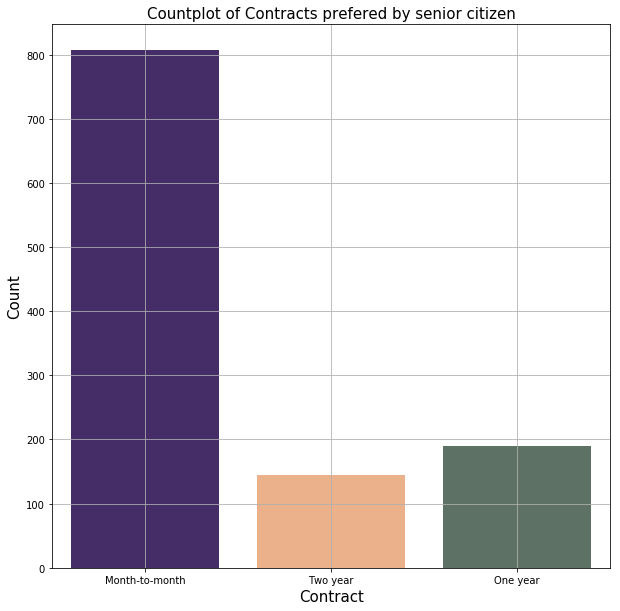

In [22]:
## in graph
prefer=df1['Contract'][df1['SeniorCitizen']==1]

plt.figure(figsize=(10,10))
plt.title("Countplot of Contracts prefered by senior citizen",fontsize=15)
sns.countplot(prefer,palette=['#432371',"#FAAE7B","#597663"])
plt.xlabel("Contract",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid()
plt.show()

<b><i>--From graph we can see that most seniors prefer Month-to-month contract--</i><b>

### 5) Comment on your finds on Payment Method?

In [23]:
## Different payment methods in the dataset
df1['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

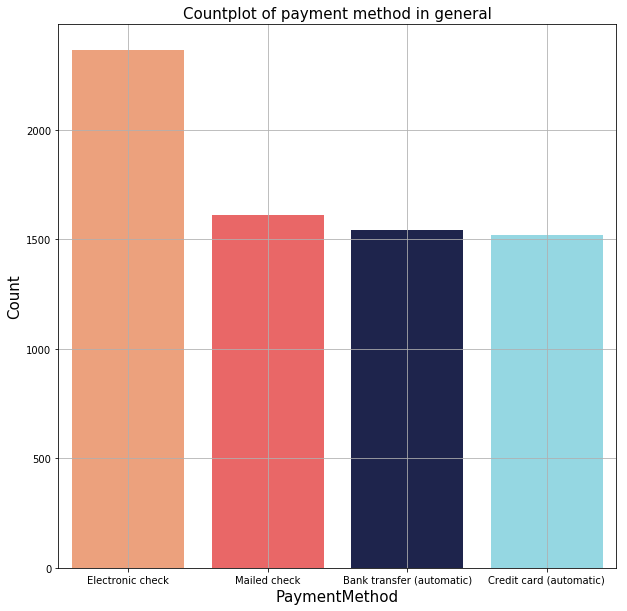

In [24]:
## Grapical representation
plt.figure(figsize=(10,10))
plt.title("Countplot of payment method in general",fontsize=15)
sns.countplot(df1['PaymentMethod'],palette=['#FF9B6A',"#FF5151","#161E54","#88E0EF"])
plt.xlabel("PaymentMethod",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid()
plt.show()

<b><i>--From above results we can see that most people prefer to use "Electronic check"--</i></b>

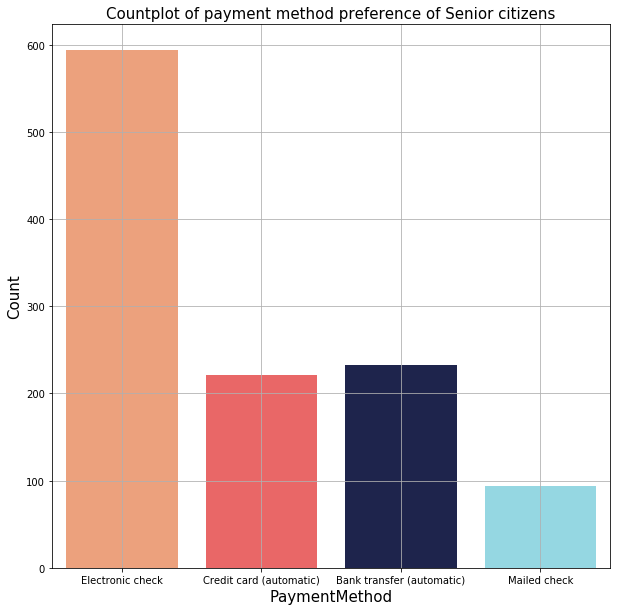

In [25]:
plt.figure(figsize=(10,10))
plt.title("Countplot of payment method preference of Senior citizens",fontsize=15)
sns.countplot(df1['PaymentMethod'][df1['SeniorCitizen']==1],palette=['#FF9B6A',"#FF5151","#161E54","#88E0EF"])
plt.xlabel("PaymentMethod",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid()
plt.show()

<b><i>--From graph we can see that a small number of senior citizens prefers Bank transfer over credit card, 
    but most prefers electronic check--</i></b>

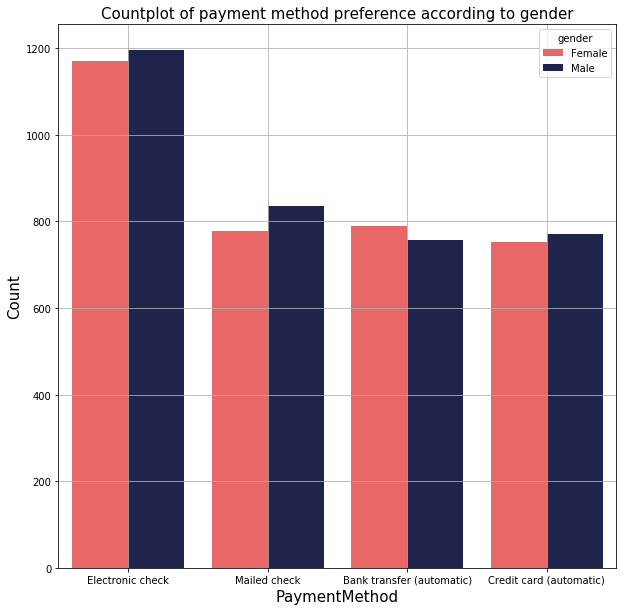

In [26]:
plt.figure(figsize=(10,10))
plt.title("Countplot of payment method preference according to gender",fontsize=15)
sns.countplot(df1['PaymentMethod'],hue=df1['gender'],palette=["#FF5151","#161E54"])
plt.xlabel("PaymentMethod",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.grid()
plt.show()

<b><i>From above graph, we can see that a small percent of Males prefer credit card over bank transfer.</i></b>
<b><i>Also a small percent of Females prefer bank transfer over mailed check.</i></b>
<b><i>Most male and female prefer electronic check.</i></b>